**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [217]:
# %%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbor = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.train_y = np.array(y).astype(int)
        self.number_of_classes = len(np.unique(self.train_y))
        if self.algorithm == 'kd_tree':
            self.tree = neighbors.KDTree(np.array(X))
        elif self.algorithm == 'brute':
            self.train_x = np.array(X)

    #     def _get_neastes_neighbor_list(self, X):
    #         test_labels = np.array([])
    #         for point in X:
    #             test_dist = [[np.linalg.norm(point - self.train_x[i]),
    #                          self.train_y[i]] for i in
    #                          range(self.train_x.shape[0])]
    #             stat = [0 for i in range(self.number_of_classes)]
    #             for d in sorted(test_dist)[0:self.n_neighbor]:
    #                 stat[d[1]] += 1
    #             test_labels = np.append(test_labels, stat)
    #         test_labels.shape = (X.shape[0], self.number_of_classes)
    #         return  test_labels

    def _get_neastes_neighbor_list(self, X):
        matrix = np.zeros((X.shape[0], self.number_of_classes),
                          dtype='float')
        i = 0
        for point in X:
            test_dist = np.copy(self.train_x)
            for k in test_dist:
    #           k = np.linalg.norm(k-point)
                k -= point
            test_dist = [np.linalg.norm(l) for l in test_dist]
            idx = np.argpartition(test_dist,
                                  self.n_neighbor)[:self.n_neighbor]
            for j in idx:
                colum = self.train_y[j]
                matrix[i][colum] += 1
            i += 1
        return matrix

    def predict_brute(self, X):
        class_list = [np.argmax(i) for i in
                      self._get_neastes_neighbor_list(X)]
        return class_list

    def predict_proba_brute(self, X):
        test_labels = np.divide(self._get_neastes_neighbor_list(X),
                                self.n_neighbor)
        return test_labels

    def predict_kd_tree(self, X):
        test_labels = np.array([])
        (dist, ind) = self.tree.query(X, k=self.n_neighbor)
        for y in self.train_y[ind]:
            test_labels = np.append(test_labels,
                                    np.bincount(y).argmax())
        return test_labels.astype(int)

    def predict_proba_kd_tree(self, X):
        test_labels = np.array([])
        (dist, ind) = self.tree.query(X, k=self.n_neighbor)
        for y in self.train_y[ind]:
            stat = np.array([])
            for i in range(self.number_of_classes):
                stat = np.append(stat, np.count_nonzero(y == i))
            test_labels = np.append(test_labels, stat)
        test_labels.shape = (X.shape[0], self.number_of_classes)
        test_labels = np.divide(test_labels, self.n_neighbor)
        return test_labels

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.predict_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_kd_tree(X)

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return self.predict_proba_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_proba_kd_tree(X)

    def score(self, X, y):
        vector = np.subtract(self.predict(X), y)
        summa = np.count_nonzero(vector)
        return 1 - summa / y.shape[0]


**IRIS**

In [177]:
iris = datasets.load_iris()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [179]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [180]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 4.38 ms, total: 4.38 ms
Wall time: 5.46 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [181]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.74 ms, sys: 37 µs, total: 1.77 ms
Wall time: 1.2 ms


In [182]:
%time clf.predict(X_test)

CPU times: user 968 µs, sys: 0 ns, total: 968 µs
Wall time: 844 µs


array([2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0])

In [183]:
%time my_clf.predict(X_test)

CPU times: user 36.2 ms, sys: 7.92 ms, total: 44.1 ms
Wall time: 38.8 ms


[2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0]

In [184]:
%time clf.predict_proba(X_test)

CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 2.09 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [185]:
%time my_clf.predict_proba(X_test)

CPU times: user 30.2 ms, sys: 4.13 ms, total: 34.3 ms
Wall time: 31.8 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [186]:
clf.score(X_test, y_test)

1.0

In [187]:
my_clf.score(X_test, y_test)

1.0

Задание 3

best n_neighbors = 1


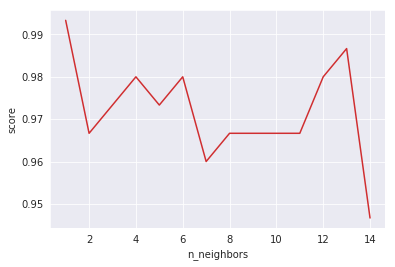

In [215]:
sns.set_style("darkgrid")
sns.set_palette("Set1", 10, 0.8)

score = []
n_neighbors = []
best_n_neighbors = 0
best_score = 0
loop = 10
neighbors_number = 15
for i in range(1, neighbors_number):
    n_neighbors.append(i)
    clf = KNeighborsClassifier(n_neighbors=i)
    score_sum = 0
    for j in range(loop):
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            test_size=0.1,
                                                            stratify=iris.target)
        clf.fit(X_train, y_train)
        score_sum += clf.score(X_test, y_test)
    sc = score_sum/loop  
    score.append(sc)
    if sc > best_score:
        best_score = sc
        best_best_n_neighbors = i

d = {'score': score, 'n_neighbors': n_neighbors}
df = pd.DataFrame(data=d)

print("best n_neighbors =", best_best_n_neighbors)

sns.lineplot(x="n_neighbors", y="score", data = df)

**MNIST**

In [198]:
mnist = fetch_mldata('MNIST original')

In [199]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [200]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [201]:
%time clf.fit(X_train, y_train)

CPU times: user 42.1 s, sys: 185 ms, total: 42.3 s
Wall time: 42.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [202]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9.31 ms, sys: 23.9 ms, total: 33.3 ms
Wall time: 31.9 ms


In [203]:
%time clf.predict(X_test)

CPU times: user 1min 18s, sys: 35.8 ms, total: 1min 18s
Wall time: 1min 18s


array([7., 0., 0., 2., 0., 1., 2., 2., 3., 2., 6., 2., 6., 9., 2., 1., 6.,
       4., 8., 1., 6., 6., 6., 3., 4., 4., 2., 6., 1., 3., 8., 8., 5., 5.,
       3., 3., 5., 3., 3., 4., 8., 0., 9., 9., 6., 8., 9., 2., 0., 0., 6.,
       4., 7., 9., 7., 9., 8., 0., 0., 8., 7., 3., 7., 1., 2., 6., 6., 3.,
       1., 3., 6., 1., 5., 4., 1., 8., 8., 2., 7., 8., 0., 1., 7., 1., 0.,
       4., 9., 4., 6., 4., 6., 1., 2., 0., 9., 1., 0., 9., 7., 9., 0., 7.,
       1., 7., 2., 7., 2., 0., 4., 6., 7., 3., 7., 1., 4., 6., 0., 2., 8.,
       7., 8., 5., 5., 3., 7., 9., 0., 2., 3., 8., 7., 6., 4., 0., 6., 3.,
       1., 3., 5., 1., 6., 8., 9., 7., 2., 3., 5., 8., 6., 1., 1., 3., 1.,
       4., 0., 6., 2., 1., 6., 4., 8., 2., 1., 4., 2., 2., 7., 9., 4., 8.,
       0., 5., 1., 4., 8., 8., 6., 7., 0., 4., 5., 9., 1., 5., 7., 8., 9.,
       2., 5., 3., 0., 2., 6., 4., 4., 6., 7., 1., 0., 0., 6., 0., 8., 8.,
       7., 8., 2., 8., 3., 8., 8., 6., 9., 1., 5., 1., 1., 7., 2., 9., 6.,
       3., 1., 7., 7., 7.

In [204]:
%time my_clf.predict(X_test)

CPU times: user 7min 44s, sys: 243 ms, total: 7min 44s
Wall time: 7min 44s


[7,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 3,
 2,
 6,
 2,
 6,
 9,
 2,
 1,
 6,
 4,
 8,
 1,
 6,
 6,
 6,
 3,
 8,
 1,
 2,
 6,
 1,
 3,
 1,
 1,
 0,
 5,
 3,
 3,
 6,
 3,
 2,
 4,
 8,
 0,
 9,
 9,
 6,
 1,
 8,
 0,
 0,
 0,
 6,
 4,
 7,
 9,
 7,
 0,
 1,
 0,
 0,
 8,
 7,
 0,
 1,
 1,
 2,
 6,
 6,
 3,
 1,
 3,
 6,
 1,
 5,
 8,
 1,
 8,
 0,
 0,
 7,
 0,
 0,
 1,
 7,
 1,
 0,
 4,
 9,
 4,
 6,
 4,
 6,
 1,
 2,
 0,
 4,
 1,
 0,
 8,
 7,
 9,
 0,
 7,
 1,
 7,
 2,
 7,
 2,
 0,
 4,
 6,
 7,
 3,
 7,
 1,
 4,
 6,
 0,
 2,
 8,
 1,
 1,
 5,
 5,
 4,
 7,
 1,
 0,
 2,
 3,
 8,
 8,
 6,
 7,
 0,
 6,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 9,
 7,
 2,
 8,
 3,
 8,
 6,
 1,
 1,
 0,
 1,
 4,
 0,
 3,
 2,
 1,
 6,
 4,
 1,
 2,
 1,
 4,
 2,
 8,
 7,
 9,
 4,
 0,
 0,
 0,
 1,
 3,
 8,
 8,
 6,
 7,
 0,
 9,
 5,
 7,
 1,
 0,
 7,
 1,
 9,
 2,
 5,
 3,
 0,
 2,
 6,
 4,
 4,
 6,
 7,
 1,
 0,
 0,
 6,
 0,
 8,
 1,
 1,
 8,
 2,
 0,
 3,
 8,
 5,
 6,
 1,
 1,
 6,
 1,
 1,
 7,
 2,
 9,
 6,
 6,
 1,
 7,
 7,
 7,
 6,
 0,
 2,
 1,
 2,
 9,
 0,
 9,
 3,
 6,
 7,
 9,
 0,
 3,
 4,
 1,
 3,
 8,
 1,
 0,
 7,
 7,
 8,
 0,


In [205]:
%time clf.predict_proba(X_test)

CPU times: user 1min 18s, sys: 35.8 ms, total: 1min 18s
Wall time: 1min 18s


array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [206]:
%time my_clf.predict_proba(X_test)

CPU times: user 7min 44s, sys: 191 ms, total: 7min 44s
Wall time: 7min 45s


array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [207]:
clf.score(X_test, y_test)

0.9671428571428572

In [209]:
my_clf.score(X_test, y_test)

0.76

Задание 4

In [136]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [137]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [138]:
%time clf.fit(X_train, y_train)

CPU times: user 33.7 s, sys: 152 ms, total: 33.9 s
Wall time: 33.8 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [139]:
%time my_clf.fit(X_train, y_train)

CPU times: user 33.8 s, sys: 223 ms, total: 34 s
Wall time: 33.9 s


In [140]:
%time clf.predict(X_test)

CPU times: user 1min 15s, sys: 19.6 ms, total: 1min 15s
Wall time: 1min 15s


array([7., 9., 8., 7., 7., 4., 7., 3., 3., 4., 2., 7., 7., 7., 6., 8., 8.,
       9., 6., 2., 3., 3., 8., 6., 2., 2., 9., 1., 5., 7., 1., 0., 8., 2.,
       9., 1., 3., 3., 8., 9., 7., 0., 4., 2., 7., 7., 0., 2., 6., 5., 5.,
       0., 6., 3., 0., 6., 8., 2., 2., 6., 5., 6., 7., 2., 0., 7., 2., 5.,
       9., 7., 6., 0., 9., 2., 0., 8., 0., 4., 1., 4., 0., 3., 6., 4., 8.,
       4., 5., 2., 6., 7., 7., 0., 9., 4., 6., 4., 3., 2., 2., 5., 0., 0.,
       0., 7., 0., 1., 4., 1., 3., 7., 0., 1., 1., 5., 9., 1., 6., 5., 8.,
       5., 6., 1., 9., 6., 8., 9., 2., 9., 2., 6., 7., 8., 1., 9., 4., 1.,
       5., 4., 3., 4., 9., 2., 2., 4., 0., 3., 1., 9., 0., 3., 4., 7., 8.,
       5., 9., 1., 4., 3., 1., 3., 4., 3., 9., 6., 8., 4., 2., 5., 3., 2.,
       0., 2., 3., 0., 4., 7., 6., 0., 3., 4., 6., 8., 2., 7., 2., 2., 5.,
       7., 4., 2., 9., 3., 5., 8., 1., 5., 4., 7., 2., 8., 2., 8., 2., 9.,
       5., 8., 8., 0., 0., 7., 2., 7., 8., 3., 2., 3., 6., 9., 6., 4., 8.,
       9., 6., 0., 5., 0.

In [141]:
%time my_clf.predict(X_test)

CPU times: user 1min 2s, sys: 3.91 ms, total: 1min 2s
Wall time: 1min 2s


array([7, 9, 8, 7, 7, 4, 7, 3, 3, 4, 2, 7, 7, 7, 6, 8, 8, 9, 6, 2, 3, 3,
       8, 6, 2, 2, 9, 1, 5, 7, 1, 0, 8, 2, 9, 1, 3, 3, 8, 9, 7, 0, 4, 2,
       7, 7, 0, 2, 6, 5, 5, 0, 6, 3, 0, 6, 8, 2, 2, 6, 5, 6, 7, 2, 0, 7,
       2, 5, 9, 7, 6, 0, 9, 2, 0, 8, 0, 4, 1, 4, 0, 3, 6, 4, 8, 4, 5, 2,
       6, 7, 7, 0, 9, 4, 6, 4, 3, 2, 2, 5, 0, 0, 0, 7, 0, 1, 4, 1, 3, 7,
       0, 1, 1, 5, 9, 1, 6, 5, 8, 5, 6, 1, 9, 6, 8, 9, 2, 9, 2, 6, 7, 8,
       1, 9, 4, 1, 5, 4, 3, 4, 9, 2, 2, 4, 0, 3, 1, 9, 0, 3, 4, 7, 8, 5,
       9, 1, 4, 3, 1, 3, 4, 3, 9, 6, 8, 4, 2, 5, 3, 2, 0, 2, 3, 0, 4, 7,
       6, 0, 3, 4, 6, 8, 2, 7, 2, 2, 5, 7, 4, 2, 9, 3, 5, 8, 1, 5, 4, 7,
       2, 8, 2, 8, 2, 9, 5, 8, 8, 0, 0, 7, 2, 7, 8, 3, 2, 3, 6, 9, 6, 4,
       8, 9, 6, 0, 5, 0, 4, 2, 6, 9, 6, 7, 9, 8, 2, 7, 3, 4, 4, 9, 2, 9,
       2, 2, 1, 3, 7, 6, 4, 8, 0, 0, 9, 1, 1, 5, 6, 5, 0, 2, 7, 5, 3, 9,
       8, 3, 0, 5, 7, 2, 0, 2, 1, 0, 8, 3, 6, 7, 5, 6, 5, 6, 5, 9, 0, 0,
       1, 6, 0, 4, 0, 1, 7, 5, 1, 1, 8, 9, 7, 4, 1,

In [142]:
%time clf.predict_proba(X_test)

CPU times: user 1min 16s, sys: 39.6 ms, total: 1min 16s
Wall time: 1min 16s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [143]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 2s, sys: 11.7 ms, total: 1min 2s
Wall time: 1min 2s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [144]:
clf.score(X_test, y_test)

0.9671428571428572

In [145]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 5

In [216]:
# seaborn - библиотека для визуализации данных (одной короткой строчкой. на коленке)
# matplotlib - библиотека для визуализации данных (может визуализировать все и по-всякому)
# train_test_split - функция из sklearn, перемешивает данные и 
# режет их в заданной пропроции на тестовую и обучающую выборку

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - синтаксическая конструкция 
# для загрузки расширенй в юпитер

# StandardScaler (from sklearn.preprocessing import StandardScaler) - 
# класс из sklearn для статистичкской стандартизации фичей. Каждая фича обрабатывается независимо

# ClassifierMixin - класс из sklearn, содержащий метод score, который возвращает среднюю точность данных
# NeighborsBase - базовый класс sklearn для оценок ближайших соседей
# KNeighborsMixin - класс из sklearn для поиска k-соседей
# SupervisedIntegerMixin - класс sklearn, используемый для рандомизации в fit методе в классе NeighborsBase